## Import libraries and data

In [1]:
import pandas as pd
import matplotlib as mpl
from matplotlib import pyplot as plt
import numpy as np
from datetime import datetime as dt
import seaborn as sns

In [2]:
import matplotlib
matplotlib.__version__

'3.7.1'

In [3]:
# loading dataframe
# during upload columns 6 & 8 resulted with mixed data types and had to be manually changed to str data types

df = pd.read_csv(r"C:\Users\Drew\New_York_CitiBike\02 Data\Prepared Data\CitiBike_NOAA_2022_Merged.csv",index_col = 0, dtype={6: str, 8: str}, low_memory=False)

In [4]:
df.columns

Index(['ride_id', 'rideable_type', 'started_at', 'ended_at',
       'start_station_name', 'start_station_id', 'end_station_name',
       'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
       'member_casual', 'date', 'avgTemp', '_merge'],
      dtype='object')

In [5]:
df.drop(columns = {'_merge'},inplace = True)

In [6]:
df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,date,avgTemp
0,BFD29218AB271154,electric_bike,2022-01-21 13:13:43.392,2022-01-21 13:22:31.463,West End Ave & W 107 St,7650.05,Mt Morris Park W & W 120 St,7685.14,40.802117,-73.968181,40.804038,-73.945925,member,2022-01-21,-6.0
1,7C953F2FD7BE1302,classic_bike,2022-01-10 11:30:54.162,2022-01-10 11:41:43.422,4 Ave & 3 St,4028.04,Boerum Pl\t& Pacific St,4488.09,40.673746,-73.985649,40.688489,-73.991160,member,2022-01-10,1.6
2,95893ABD40CED4B8,electric_bike,2022-01-26 10:52:43.096,2022-01-26 11:06:35.227,1 Ave & E 62 St,6753.08,5 Ave & E 29 St,6248.06,40.761227,-73.960940,40.745168,-73.986831,member,2022-01-26,-2.3
3,F853B50772137378,classic_bike,2022-01-03 08:35:48.247,2022-01-03 09:10:50.475,2 Ave & E 96 St,7338.02,5 Ave & E 29 St,6248.06,40.783964,-73.947167,40.745168,-73.986831,member,2022-01-03,1.4
4,7590ADF834797B4B,classic_bike,2022-01-22 14:14:23.043,2022-01-22 14:34:57.474,6 Ave & W 34 St,6364.10,5 Ave & E 29 St,6248.06,40.749640,-73.988050,40.745168,-73.986831,member,2022-01-22,-5.9


In [7]:
df.shape

(29838166, 15)

In [8]:
df.dtypes

ride_id                object
rideable_type          object
started_at             object
ended_at               object
start_station_name     object
start_station_id       object
end_station_name       object
end_station_id         object
start_lat             float64
start_lng             float64
end_lat               float64
end_lng               float64
member_casual          object
date                   object
avgTemp               float64
dtype: object

In [9]:
# Change date column to datetime format

df['date'] = pd.to_datetime(df['date'])

In [10]:
# Check data type change for date column

df.dtypes

ride_id                       object
rideable_type                 object
started_at                    object
ended_at                      object
start_station_name            object
start_station_id              object
end_station_name              object
end_station_id                object
start_lat                    float64
start_lng                    float64
end_lat                      float64
end_lng                      float64
member_casual                 object
date                  datetime64[ns]
avgTemp                      float64
dtype: object

## Pandas basic plotting

In [11]:
df_temp = df.set_index('date')

In [47]:
# Ensure df_temp is sorted by date

df_temp = df_temp.sort_values(by='date')

In [13]:
df_temp.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,avgTemp
date,,,,,,,,,,,,,,
2022-01-01,FB33E3D8F21E2941,electric_bike,2022-01-01 01:49:37.374,2022-01-01 01:57:50.346,Canal St & Rutgers St,5303.08,Norfolk St & Broome St,5374.01,40.714275,-73.989900,40.717227,-73.988021,casual,11.6
2022-01-01,755337295F178067,electric_bike,2022-01-01 03:21:09.754,2022-01-01 03:49:33.047,Lewis Ave & Madison St,4425.02,Columbia St & Degraw St,4422.04,40.686312,-73.935775,40.685930,-74.002424,member,11.6
2022-01-01,C62CA87E3A475ADD,classic_bike,2022-01-01 08:38:18.156,2022-01-01 08:47:54.213,Carlton Ave & Park Ave,4732.04,Emerson Pl & Myrtle Ave,4683.02,40.695807,-73.973556,40.693631,-73.962236,casual,11.6
2022-01-01,CD7A2098AFCD5514,classic_bike,2022-01-01 10:33:58.529,2022-01-01 10:47:05.197,W 100 St & Broadway,7580.01,W 67 St & Broadway,7116.04,40.797372,-73.970412,40.774925,-73.982666,casual,11.6
2022-01-01,3F9E0C51F49F78A3,electric_bike,2022-01-01 20:05:19.592,2022-01-01 20:12:00.661,W 18 St & 6 Ave,6064.08,W 42 St & 6 Ave,6517.08,40.739713,-73.994564,40.754920,-73.984550,member,11.6


<Axes: xlabel='date'>

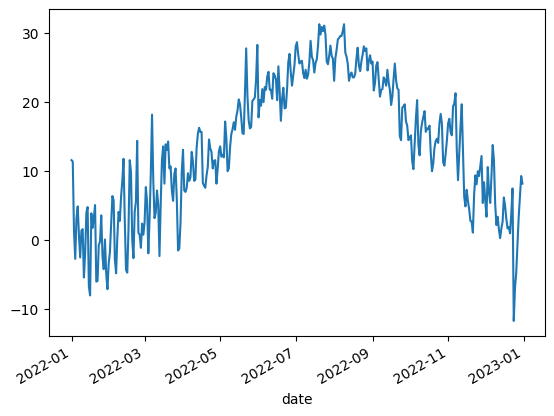

In [14]:
# create line plot using the average temperature

df_temp['avgTemp'].plot()

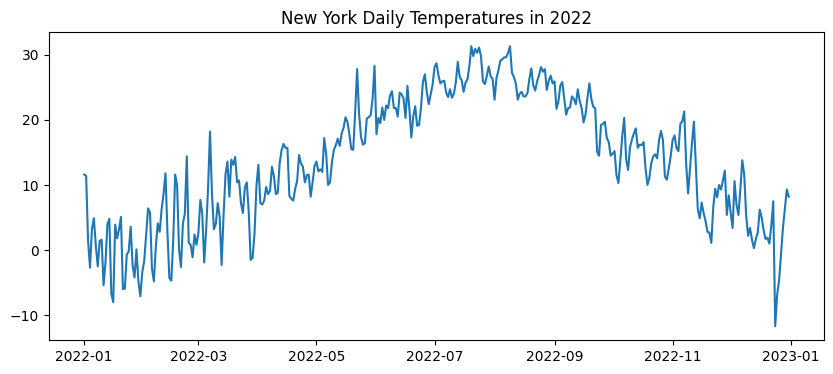

In [15]:
plt.figure(figsize=(10,4))
plt.title('New York Daily Temperatures in 2022')
plt.plot(df_temp['avgTemp'])
plt.show()

### Pandas basic plotting by monthly temperature and number of rides

In [16]:
# Due to the large amount of data, the line graph with original data caused rendering issues.
# Resampling the data by taking the monthly average made it easier to plot..

df_temp_resampled = df_temp.resample('M').mean(numeric_only=True)

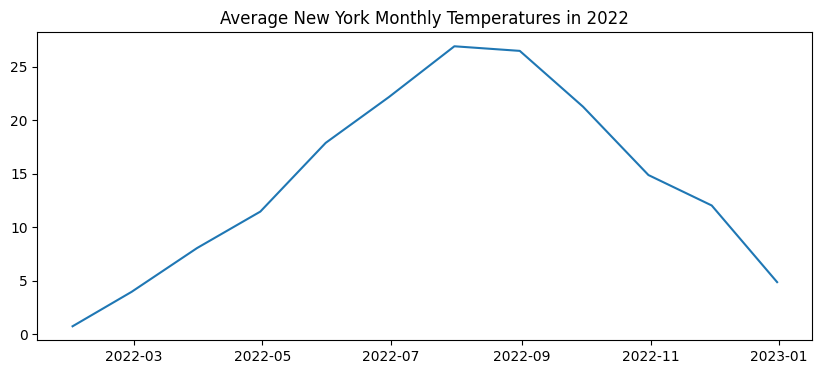

In [17]:

plt.figure(figsize=(10,4))
plt.title('Average New York Monthly Temperatures in 2022')
plt.plot(df_temp_resampled['avgTemp'])
plt.show()

In [18]:
# Resample the data by month and count the number of rides

df_rides_resampled = df_temp.resample('M').count()

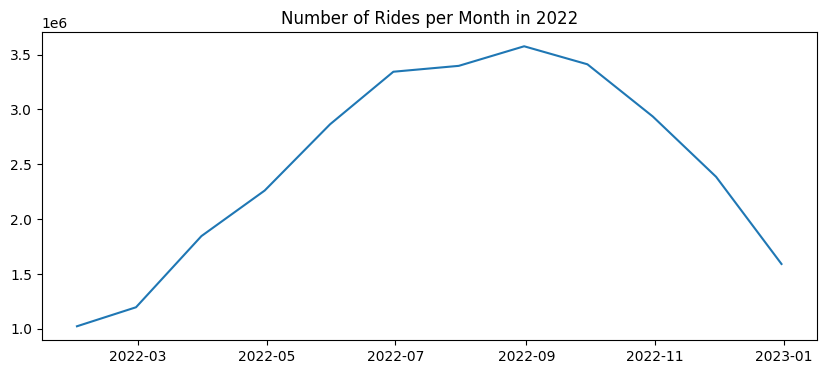

In [19]:
# plot the number of rides per month

plt.figure(figsize=(10, 4))
plt.title('Number of Rides per Month in 2022')
plt.plot(df_rides_resampled['ride_id'])
plt.show()

## Aggregating a Counted number of trips per day

In [20]:
df.columns

Index(['ride_id', 'rideable_type', 'started_at', 'ended_at',
       'start_station_name', 'start_station_id', 'end_station_name',
       'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
       'member_casual', 'date', 'avgTemp'],
      dtype='object')

In [21]:
# Group the number of ride by date to get the total number of rides per day in a new dataframe

df_group = pd.DataFrame(df.groupby(['date'])['ride_id'].count()).reset_index()

In [22]:
df_group.head()

,date,ride_id
0,2022-01-01,20428
1,2022-01-02,43009
2,2022-01-03,33189
3,2022-01-04,36842
4,2022-01-05,34230


In [23]:
df_group.tail()

,date,ride_id
360,2022-12-27,33044
361,2022-12-28,44027
362,2022-12-29,51674
363,2022-12-30,62298
364,2022-12-31,31466


In [24]:
df_group.rename(columns = {'ride_id':'number_of_rides'}, inplace = True)
df = df.merge(df_group, on = "date", how = 'outer', indicator = True)
print(df['_merge'].value_counts(dropna = False))
print("Shape of January 1st is", df[df['date'] == '2022-01-01'].shape) # Check
print("Shape of January 2nd is", df[df['date'] == '2022-01-02'].shape) # Second check

df_temp = df.set_index('date')

print(df_temp.columns)

both          29838166
left_only            0
right_only           0
Name: _merge, dtype: int64
Shape of January 1st is (20428, 17)
Shape of January 2nd is (43009, 17)
Index(['ride_id', 'rideable_type', 'started_at', 'ended_at',
       'start_station_name', 'start_station_id', 'end_station_name',
       'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
       'member_casual', 'avgTemp', 'number_of_rides', '_merge'],
      dtype='object')


In [25]:
df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,date,avgTemp,number_of_rides,_merge
0,BFD29218AB271154,electric_bike,2022-01-21 13:13:43.392,2022-01-21 13:22:31.463,West End Ave & W 107 St,7650.05,Mt Morris Park W & W 120 St,7685.14,40.802117,-73.968181,40.804038,-73.945925,member,2022-01-21,-6.0,33598,both
1,096AE4C21473D1D6,electric_bike,2022-01-21 20:32:55.968,2022-01-21 20:35:20.227,Riverside Dr & W 91 St,7524.16,Riverside Dr & W 82 St,7388.10,40.793135,-73.977004,40.787209,-73.981281,member,2022-01-21,-6.0,33598,both
2,B3996D7CAEDF7B92,classic_bike,2022-01-21 09:14:04.856,2022-01-21 09:18:53.000,Henry St & Atlantic Ave,4531.05,Clinton St & Tillary St,4748.07,40.690893,-73.996123,40.696233,-73.991421,member,2022-01-21,-6.0,33598,both
3,83AE874442FFF355,electric_bike,2022-01-21 17:30:27.244,2022-01-21 17:36:00.300,Cleveland Pl & Spring St,5492.05,Rivington St & Ridge St,5406.02,40.722104,-73.997249,40.718502,-73.983299,member,2022-01-21,-6.0,33598,both
4,8B1950B6ED5BD50A,electric_bike,2022-01-21 10:12:57.242,2022-01-21 10:31:37.016,1 Ave & E 62 St,6753.08,Allen St & Rivington St,5414.06,40.761227,-73.960940,40.720196,-73.989978,member,2022-01-21,-6.0,33598,both


## Create dual axis line chart of daily bike trips and daily temperatures

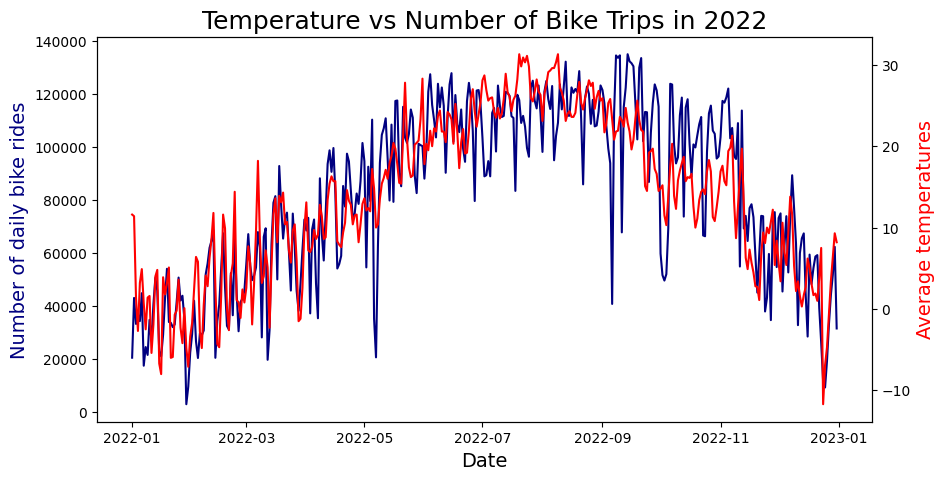

In [48]:
# Create figure and axis objects with subplots() and details

fig1,ax = plt.subplots(figsize=(10, 5))

# plot of the bike rides

ax.plot(df_temp['number_of_rides'],color = "navy")
ax.set_xlabel("Date", fontsize = 14) # set x-axis
ax.set_ylabel("Number of daily bike rides",color = "navy", fontsize = 14) # set y-axis

# create the dual axis for two different y-axis on the x-axis plot

ax2 = ax.twinx()

# plot with the daily temperatues on the y-axis using second axis object

ax2.plot(df_temp["avgTemp"], color = "red")
ax2.set_ylabel("Average temperatures", color = "red",fontsize=14)
plt.title('Temperature vs Number of Bike Trips in 2022', fontsize = 18)
plt.show()

fig1.savefig(r"C:\Users\Drew\New_York_CitiBike\04 Analysis\Visualizations\Temp_vs_Trips_Comparison.png")

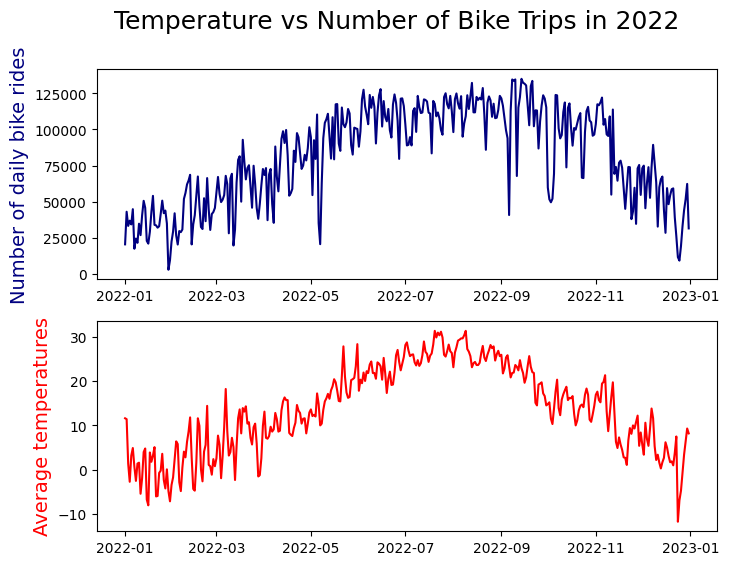

In [49]:
# Create figure and axis objects with subplots() and details

fig2,ax = plt.subplots(2, figsize =(8, 6))

# plot number of daily bike rides
ax[0].plot(df_temp['number_of_rides'],color = "navy")
ax[0].set_ylabel("Number of daily bike rides",color = "navy", fontsize = 14) # set y-axis label

# plot with the temperatues on the y-axis using second axis object
ax[1].plot(df_temp["avgTemp"], color = "red")
ax[1].set_ylabel("Average temperatures", color = "red",fontsize=14)
plt.suptitle('Temperature vs Number of Bike Trips in 2022', fontsize = 18)

plt.show()

fig2.savefig(r"C:\Users\Drew\New_York_CitiBike\04 Analysis\Visualizations\Temp_vs_Trips_Separate_Comparison.png")

## Create dual axis line chart of monthly bike trips and monthly temperatures

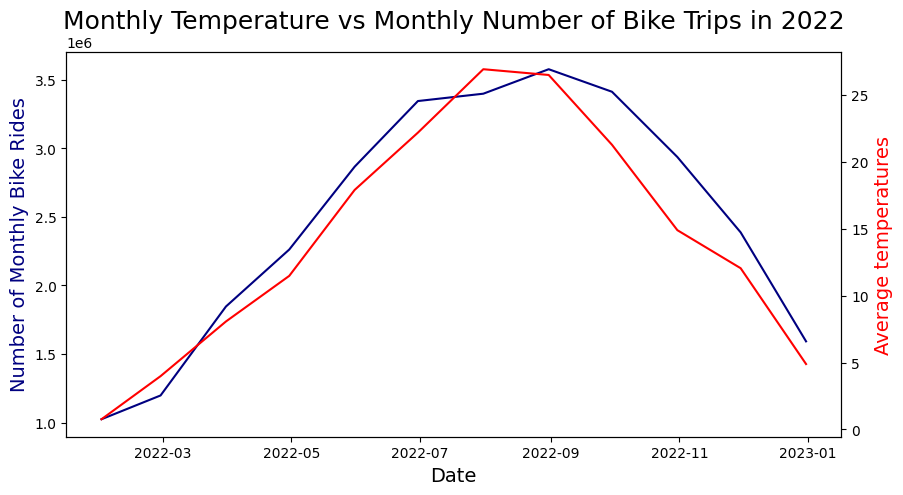

In [28]:
# Create figure and axis objects with subplots() and details

fig3,ax = plt.subplots(figsize=(10, 5))

# plot of the bike rides

ax.plot(df_rides_resampled['ride_id'],color = "navy")
ax.set_xlabel("Date", fontsize = 14) # set x-axis
ax.set_ylabel("Number of Monthly Bike Rides",color = "navy", fontsize = 14) # set y-axis

# create the dual axis for two different y-axis on the x-axis plot

ax2 = ax.twinx()

# plot with the daily temperatues on the y-axis using second axis object

ax2.plot(df_temp_resampled["avgTemp"], color = "red")
ax2.set_ylabel("Average temperatures", color = "red",fontsize=14)
plt.title('Monthly Temperature vs Monthly Number of Bike Trips in 2022', fontsize = 18)
plt.show()

fig3.savefig(r"C:\Users\Drew\New_York_CitiBike\04 Analysis\Visualizations\Monthly_Temp_vs_Trips_Comparison.png")

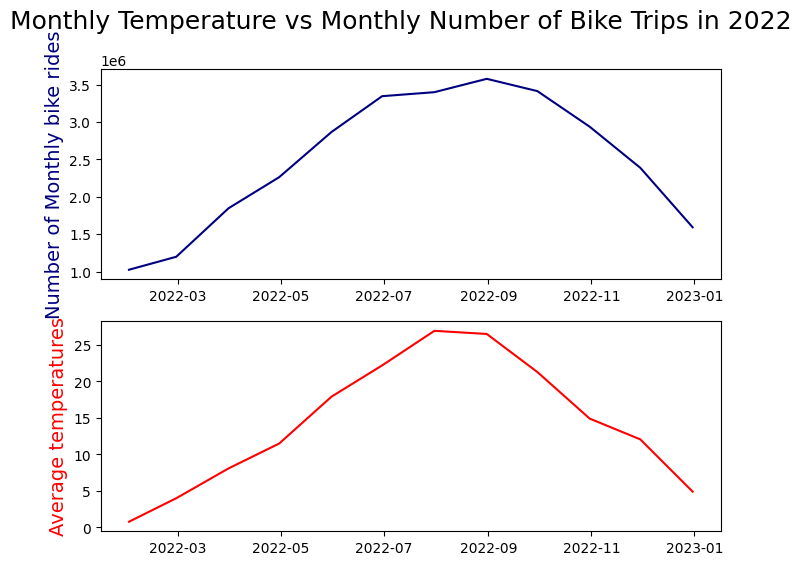

In [29]:
# Create figure and axis objects with subplots() and details

fig4,ax = plt.subplots(2, figsize =(8, 6))

# plot number of daily bike rides
ax[0].plot(df_rides_resampled['ride_id'],color = "navy")
ax[0].set_ylabel("Number of Monthly bike rides",color = "navy", fontsize = 14) # set y-axis label

# plot with the temperatues on the y-axis using second axis object
ax[1].plot(df_temp_resampled["avgTemp"], color = "red")
ax[1].set_ylabel("Average temperatures", color = "red",fontsize=14)
plt.suptitle('Monthly Temperature vs Monthly Number of Bike Trips in 2022', fontsize = 18)

plt.show()

fig4.savefig(r"C:\Users\Drew\New_York_CitiBike\04 Analysis\Visualizations\Monthly_Temp_vs_Trips_Separate_Comparison.png")

## Explaanation of code, Matplotlib use, and paradigm use

### Figure 1: Temperature vs Number of Daily Bike Trips in 2022

    This graph shows a dual-axis line plot. The primary y-axis shows the number of daily bike trips, while the secondary y-axis shows the daily temperature values. The data is plotted using plt.subplots() and ax.twinx() to add a second y-axis, allowing both datasets to be visualized together. The graph was saved using the fig1.savefig() function.

### Figure 2: Temperature vs Number of Daily Bike Trips (Separated)
    Two separate line plots were created to show the number of daily bike rides and daily average  temperature values, respectively. This was done to present a clear, distinct comparison between the variables without overlapping lines. The graph was saved using the fig2.savefig() function.

### Figure 3: Monthly Temperature vs Monthly Number of Bike Trips in 2022 (Combined)
    A dual-axis line plot was used to compare monthly average temperatures against the number of monthly bike rides. plt.subplots() and ax.twinx() were utilized to add a second y-axis and display both variables on the same graph. This graph was saved using fig3.savefig().

### Figure 4: Monthly Temperature vs Monthly Number of Bike Trips (Separated)
    This visualization splits the monthly temperature and bike trip data into separate line plots for better clarity, avoiding any overlap between the lines. It provides a straightforward comparison for each variable independently. It was saved using fig4.savefig().

### Paradigm Used
    The paradigm used for this code is Object-Oriented Programming (OOP). In Matplotlib, the use of plt.subplots() and creating figures (fig1, fig2, etc.) and axis objects (ax, ax2) represent an object-oriented approach. This paradigm allows for better control and customization of the figure, making it easy to manipulate axes, labels, titles, and other components independently.
    By using fig, ax = plt.subplots(), I created a figure (fig) object and an axis (ax) object. These objects were then used to add plots, labels, and titles, and ultimately save the figure. This object-oriented method is more flexible and powerful when working with multiple plots and customizing visualizations, as seen in the given figures.

## Bonus

### create a histogram of the variable “tripduration” using matplotlib. 

In [30]:
df.dtypes

ride_id                       object
rideable_type                 object
started_at                    object
ended_at                      object
start_station_name            object
start_station_id              object
end_station_name              object
end_station_id                object
start_lat                    float64
start_lng                    float64
end_lat                      float64
end_lng                      float64
member_casual                 object
date                  datetime64[ns]
avgTemp                      float64
number_of_rides                int64
_merge                      category
dtype: object

In [31]:
# changing started_at and ended_at to datetime objects
# pd.to_datetime() is used to ensure that started_at and ended_at are in datetime format.
df['started_at'] = pd.to_datetime(df['started_at'])
df['ended_at'] = pd.to_datetime(df['ended_at'])

In [32]:
# Calculate trip duration in minutes
# tripduration is calculated by subtracting started_at from ended_at and converting the result to minutes using .dt.total_seconds() / 60.
df['tripduration'] = (df['ended_at'] - df['started_at']).dt.total_seconds() / 60

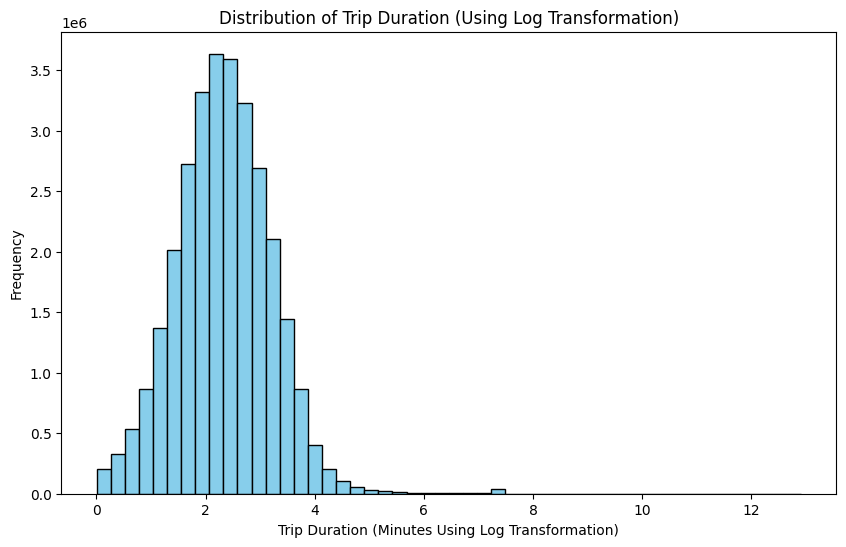

In [63]:
# Apply a log transformation to the trip duration to reduce skewness
filtered_df = df[df['tripduration'] > 1].copy() # Filter out non-positive values, as log is undefined for <= 0.
filtered_df['log_tripduration'] = np.log(filtered_df['tripduration']) # Natural log transformation (base e=2.718)

# Creating histogram with log-transformed data
plt.figure(figsize=(10, 6))
plt.hist(filtered_df['log_tripduration'], bins=50, color='skyblue', edgecolor='black', density=False)

# Explanation of x-axis:
# The x-axis represents the natural log of the trip duration (in minutes). 
# If you want to find the original trip duration for a specific x-value, you need to take the exponent (base e).
# For example, to find the original value for an x-axis value of 2:
# original_duration = e^2 ≈ 7.39 minutes (using e ≈ 2.718; x-axis 2 would then be 2.718 * 2.718 for a 7.38 minute bike trip)
plt.xlabel('Trip Duration (Minutes Using Log Transformation)')
plt.ylabel('Frequency')
plt.title('Distribution of Trip Duration (Using Log Transformation)')
plt.show()

### Add curve to histrogram (Due to distribution of data and its size causing memory errors, sample size created to get a better look at curve line)

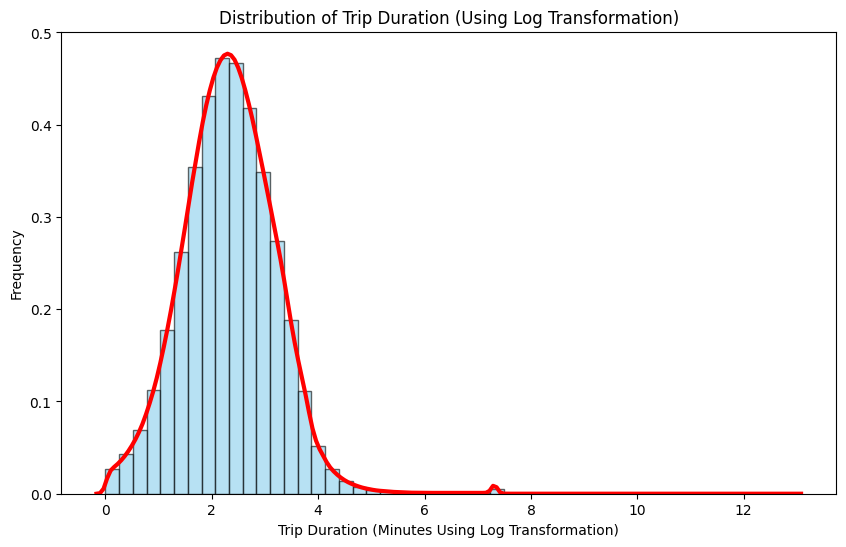

In [65]:
# Creating histogram with KDE curve
plt.figure(figsize=(10, 6))

# Creating histogram with log-transformed data
plt.hist(filtered_df['log_tripduration'], bins=50, color='skyblue', edgecolor='black', density=True, alpha=0.6)

# Add the KDE curve separately with adjustments
sns.kdeplot(filtered_df['log_tripduration'], color='red', linewidth=3, bw_adjust=2)

# Explanation of x-axis:
# The x-axis represents the natural log of the trip duration (in minutes).
# If you want to find the original trip duration for a specific x-value, you need to take the exponent (base e).
# For example, to find the original value for an x-axis value of 2:
# original_duration = e^2 ≈ 7.39 minutes (using e = 2.718; x-axis 2 would then be 2.718 * 2.718 for a 7.38 minute bike trip)

plt.xlabel('Trip Duration (Minutes Using Log Transformation)')
plt.ylabel('Frequency')
plt.title('Distribution of Trip Duration (Using Log Transformation)')
plt.show()

### Creating figure with two axes that represent a bar plot and a pie chart

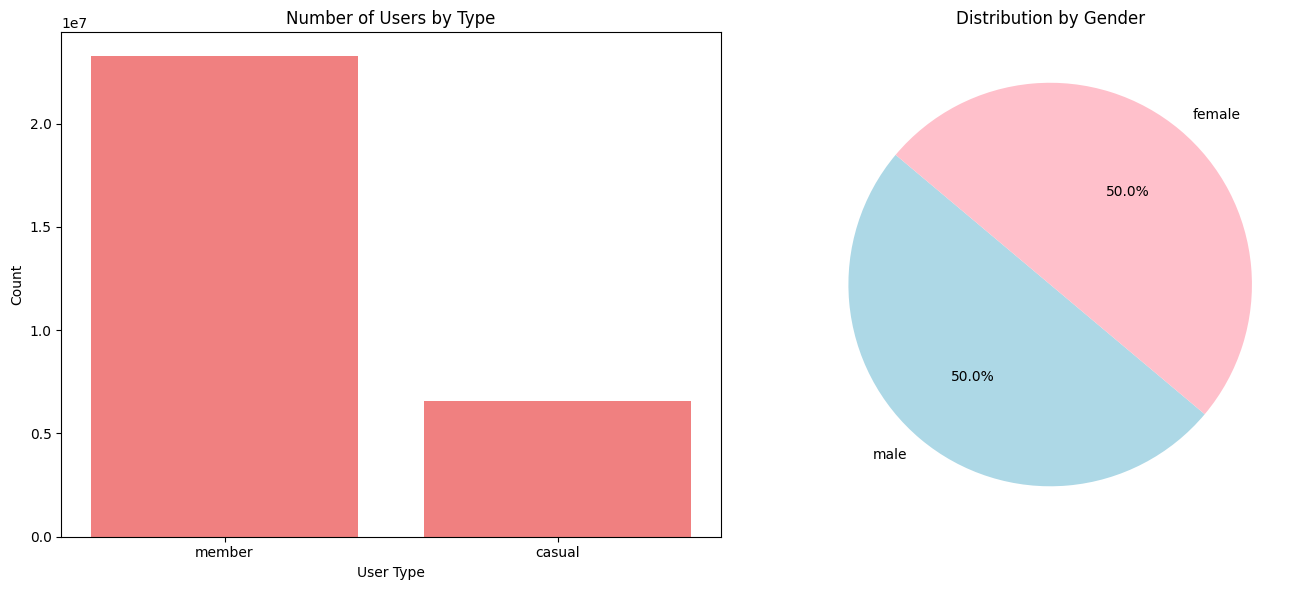

In [35]:
# Prepare data for plots
usertype_counts = df['member_casual'].value_counts()

# Creating a dummy 'gender' column
df['gender'] = ['male', 'female'] * (len(df) // 2)
gender_counts = df['gender'].value_counts() # Count the number of occurrences of each gender

# Create figure and axes
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Bar chart for usertype
ax1.bar(usertype_counts.index, usertype_counts.values, color='lightcoral')
ax1.set_title('Number of Users by Type')
ax1.set_xlabel('User Type')
ax1.set_ylabel('Count')

# Pie chart for gender
# `autopct='%1.1f%%'` displays percentages with 1 decimal place
# `startangle=140` starts the pie chart at an angle to make it more visually appealing
ax2.pie(gender_counts.values, labels=gender_counts.index, autopct='%1.1f%%', startangle=140, colors=['lightblue', 'pink'])
ax2.set_title('Distribution by Gender')

# Display the plots
plt.tight_layout()
plt.show()
